Ejercicio 1

In [ ]:
from sympy import symbols, integrate

y = symbols('y')
f_y = 12 * y * (1 - y)
F_y = integrate(f_y, (y, 0, y))
F_y_simplified = F_y.simplify()

print("Función de distribución acumulativa (CDF) de Y:", F_y_simplified)


Función de distribución acumulativa (CDF) de Y: y**2*(6 - 4*y)


In [ ]:
from sympy import N

# P(Y ≤ 4)
P_Y_le_4 = N(F_y.subs(y, 4/12))
# P(Y > 6) = 1 - P(Y ≤ 6)
P_Y_gt_6 = 1 - N(F_y.subs(y, 6/12))
# P(4 ≤ Y ≤ 6) = F(6) - F(4)
P_Y_between_4_6 = N(F_y.subs(y, 6/12)) - N(F_y.subs(y, 4/12))

print("P(Y ≤ 4):", P_Y_le_4)
print("P(Y > 6):", P_Y_gt_6)
print("P(4 ≤ Y ≤ 6):", P_Y_between_4_6)


P(Y ≤ 4): 0.518518518518518
P(Y > 6): 0
P(4 ≤ Y ≤ 6): 0.481481481481482


In [ ]:
E_Y = integrate(y * f_y, (y, 0, 1)).evalf()
E_Y2 = integrate(y**2 * f_y, (y, 0, 1)).evalf()
Var_Y = E_Y2 - E_Y**2

print("E(Y):", E_Y)
print("E(Y^2):", E_Y2)
print("Var(Y):", Var_Y)


E(Y): 1.00000000000000
E(Y^2): 0.600000000000000
Var(Y): -0.400000000000000


In [ ]:
expected_value = E_Y
P_risk = 1 - N(F_y.subs(y, expected_value + 2/12))

print("P(ruptura a más de 2 pulg del punto esperado):", P_risk)


P(ruptura a más de 2 pulg del punto esperado): -0.814814814814815


Ejercicio 2

In [ ]:
x = symbols('x')
f_x = 9 * (4 - x**2)
integral = integrate(f_x, (x, -1, 2))

print("Integral de f(x):", integral)

Integral de f(x): 81


In [ ]:
F_x = integrate(f_x, (x, -1, x))
print("Función de distribución acumulativa (CDF) de X:", F_x)

Función de distribución acumulativa (CDF) de X: -3*x**3 + 36*x + 33


In [ ]:
E_X = integrate(x * f_x, (x, -1, 2)).evalf()
E_X2 = integrate(x**2 * f_x, (x, -1, 2)).evalf()
Var_X = E_X2 - E_X**2

print("E(X):", E_X)
print("E(X^2):", E_X2)
print("Var(X):", Var_X)

E(X): 20.2500000000000
E(X^2): 48.6000000000000
Var(X): -361.462500000000


In [ ]:
P_X_lt_0 = N(F_x.subs(x, 0))

print("P(X < 0):", P_X_lt_0)

P(X < 0): 33.0000000000000


In [ ]:
P_X_between_4_6 = N(F_x.subs(x, 6)) - N(F_x.subs(x, 4))

print("P(4 ≤ X ≤ 6):", P_X_between_4_6)

P(4 ≤ X ≤ 6): -384.000000000000


Ejercicio 3

In [ ]:
from scipy.stats import norm

mu = 137.2
sigma = 1.6
declared = 135

P_gt_declared = 1 - norm.cdf(declared, mu, sigma)

print("P(> contenido declarado):", P_gt_declared)

P(> contenido declarado): 0.9154342776486631


In [ ]:
from scipy.stats import norm

mu = 137.2
desired_prob = 0.95
z = norm.ppf(1 - desired_prob)
new_sigma = (mu - declared) / z

print("Nueva desviación estándar:", new_sigma)


Nueva desviación estándar: -1.3375050302058853


In [ ]:
from scipy.stats import binom

n = 10
p = P_gt_declared
P_at_least_8 = 1 - binom.cdf(7, n, p)

print("P(≥8 frascos contengan más):", P_at_least_8)


P(≥8 frascos contengan más): 0.9538238329543586


Ejercicio 4

In [ ]:
mu = 96
sigma = 14
P_gt_100 = 1 - norm.cdf(100, mu, sigma)

print("P(tamaño de grano > 100):", P_gt_100)


P(tamaño de grano > 100): 0.38754848109799234


In [ ]:
P_50_to_80 = norm.cdf(80, mu, sigma) - norm.cdf(50, mu, sigma)

print("P(50 ≤ tamaño de grano ≤ 80):", P_50_to_80)


P(50 ≤ tamaño de grano ≤ 80): 0.1260403337983934


In [ ]:
interval = norm.ppf([0.05, 0.95], mu, sigma)

print("Intervalo que incluye el 90% central:", interval)


Intervalo que incluye el 90% central: [ 72.97204922 119.02795078]


Ejercicio 5

Imports para todas las partes de este ejercicio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Parte a

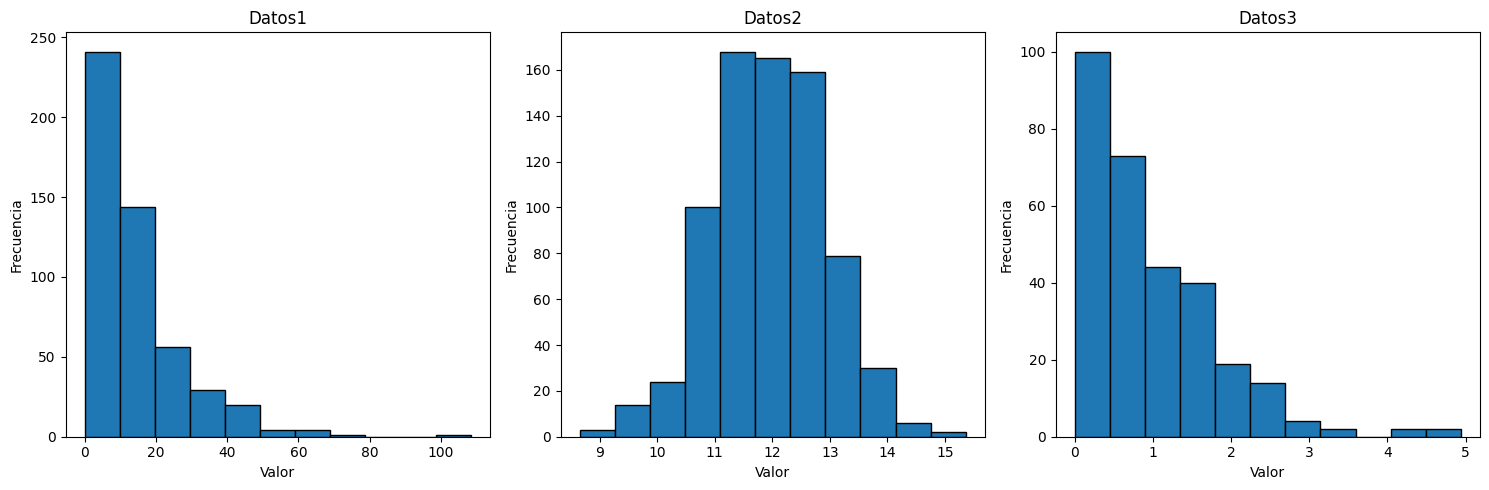

In [ ]:
df = pd.read_csv('/content/Actividad 1 Distribuciones.csv')

def sturges_rule(n):
    return int(np.ceil(np.log2(n) + 1))

n_bins_datos1 = sturges_rule(len(df['Datos1']))
n_bins_datos2 = sturges_rule(len(df['Datos2']))
n_bins_datos3 = sturges_rule(len(df['Datos3']))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df['Datos1'], bins=n_bins_datos1, edgecolor='black')
plt.title('Datos1')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(df['Datos2'], bins=n_bins_datos2, edgecolor='black')
plt.title('Datos2')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(df['Datos3'], bins=n_bins_datos3, edgecolor='black')
plt.title('Datos3')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Parte b

Número de clases (Sturges) para Datos1: 11
Número de clases (Scott) para Datos1: 21
Número de clases (Sturges) para Datos2: 11
Número de clases (Scott) para Datos2: 18
Número de clases (Sturges) para Datos3: 11
Número de clases (Scott) para Datos3: 16


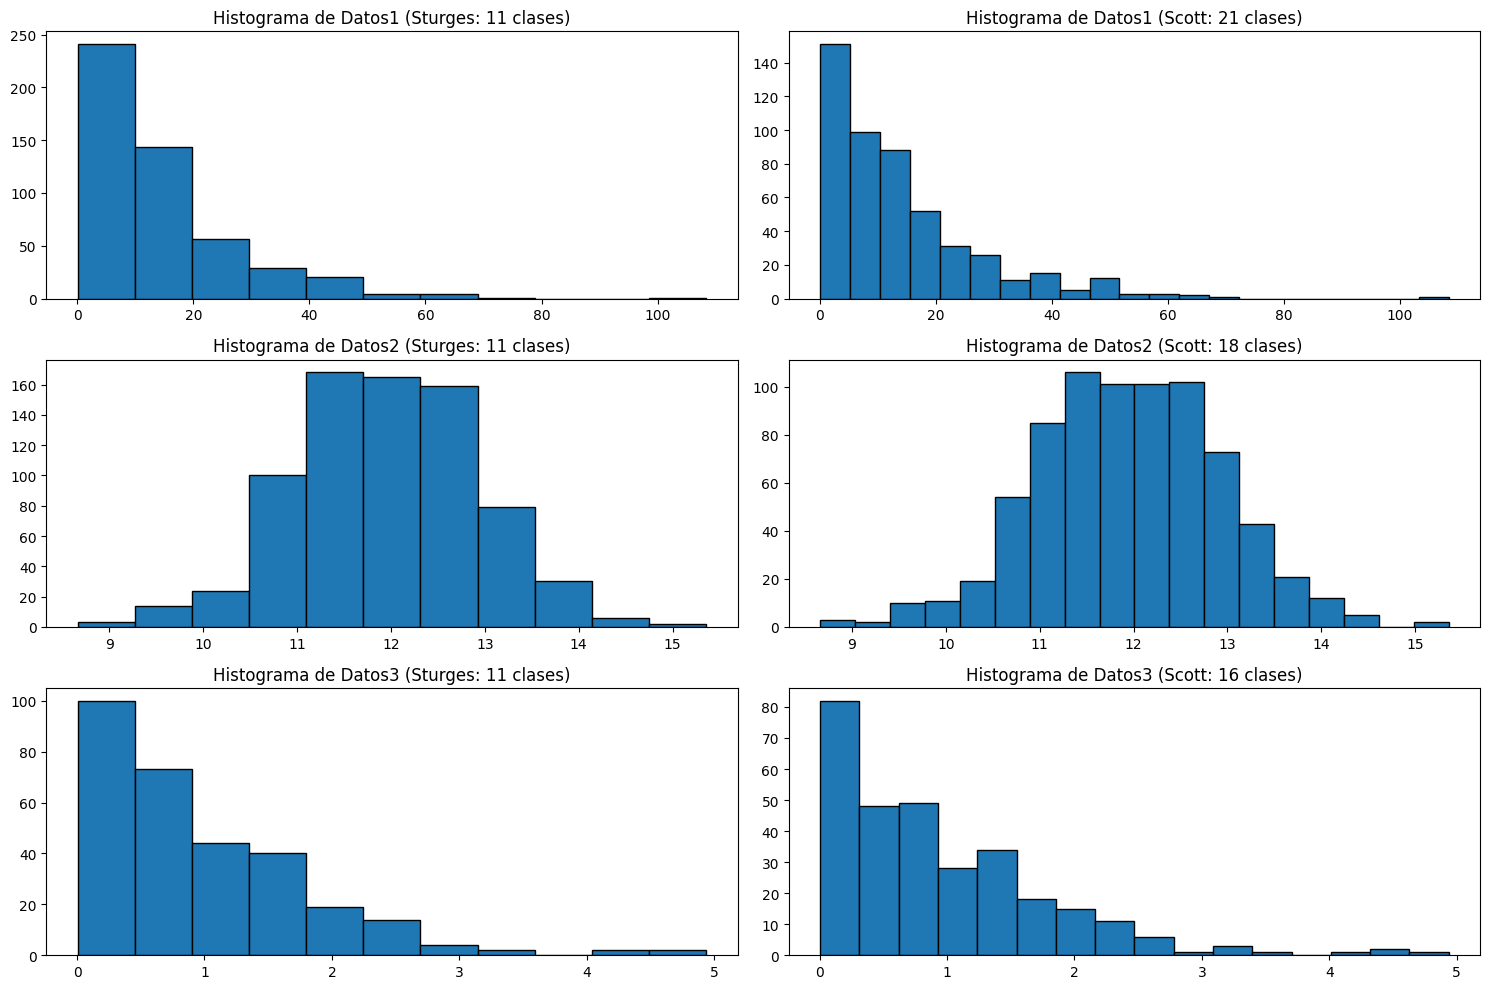

In [ ]:
df = pd.read_csv('/content/Actividad 1 Distribuciones.csv')

def sturges_rule(n):
    return int(np.ceil(np.log2(n) + 1))

def scott_rule(data):
    bin_width = 3.5 * np.std(data) / np.power(len(data), 1/3)
    return int(np.ceil((max(data) - min(data)) / bin_width))

n_bins_sturges_datos1 = sturges_rule(len(df['Datos1']))
n_bins_sturges_datos2 = sturges_rule(len(df['Datos2']))
n_bins_sturges_datos3 = sturges_rule(len(df['Datos3']))

n_bins_scott_datos1 = scott_rule(df['Datos1'])
n_bins_scott_datos2 = scott_rule(df['Datos2'])
n_bins_scott_datos3 = scott_rule(df['Datos3'])

print(f"Número de clases (Sturges) para Datos1: {n_bins_sturges_datos1}")
print(f"Número de clases (Scott) para Datos1: {n_bins_scott_datos1}")
print(f"Número de clases (Sturges) para Datos2: {n_bins_sturges_datos2}")
print(f"Número de clases (Scott) para Datos2: {n_bins_scott_datos2}")
print(f"Número de clases (Sturges) para Datos3: {n_bins_sturges_datos3}")
print(f"Número de clases (Scott) para Datos3: {n_bins_scott_datos3}")

plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
plt.hist(df['Datos1'], bins=n_bins_sturges_datos1, edgecolor='black')
plt.title(f'Histograma de Datos1 (Sturges: {n_bins_sturges_datos1} clases)')

plt.subplot(3, 2, 2)
plt.hist(df['Datos1'], bins=n_bins_scott_datos1, edgecolor='black')
plt.title(f'Histograma de Datos1 (Scott: {n_bins_scott_datos1} clases)')

plt.subplot(3, 2, 3)
plt.hist(df['Datos2'], bins=n_bins_sturges_datos2, edgecolor='black')
plt.title(f'Histograma de Datos2 (Sturges: {n_bins_sturges_datos2} clases)')

plt.subplot(3, 2, 4)
plt.hist(df['Datos2'], bins=n_bins_scott_datos2, edgecolor='black')
plt.title(f'Histograma de Datos2 (Scott: {n_bins_scott_datos2} clases)')

plt.subplot(3, 2, 5)
plt.hist(df['Datos3'], bins=n_bins_sturges_datos3, edgecolor='black')
plt.title(f'Histograma de Datos3 (Sturges: {n_bins_sturges_datos3} clases)')

plt.subplot(3, 2, 6)
plt.hist(df['Datos3'], bins=n_bins_scott_datos3, edgecolor='black')
plt.title(f'Histograma de Datos3 (Scott: {n_bins_scott_datos3} clases)')

plt.tight_layout()
plt.show()


Parte c

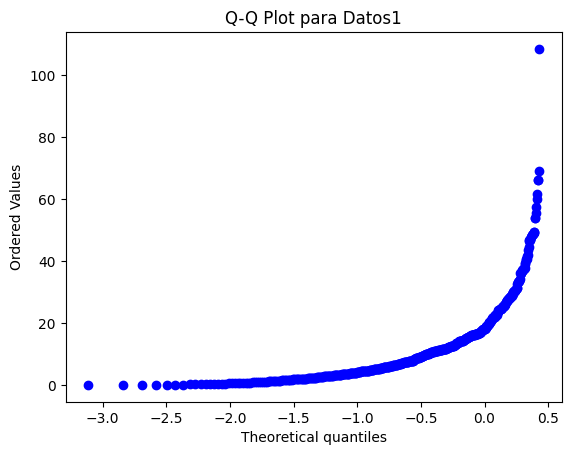

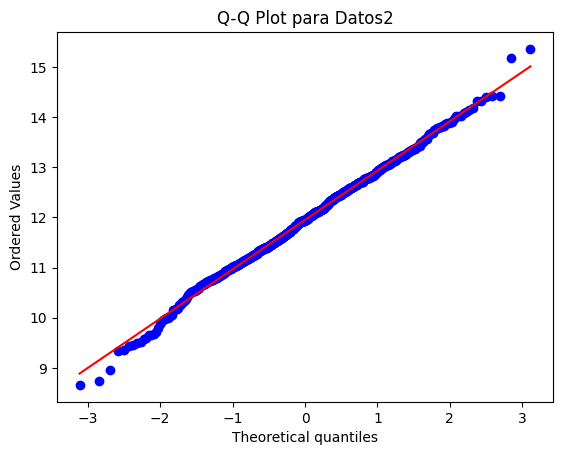

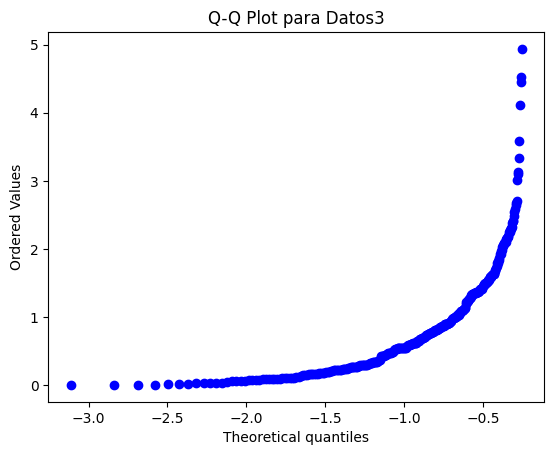

Parámetros estimados para Datos1: media = nan, desviación estándar = nan
Parámetros estimados para Datos2: media = 11.95, desviación estándar = 1.04
Parámetros estimados para Datos3: media = nan, desviación estándar = nan


In [ ]:
df = pd.read_csv('/content/Actividad 1 Distribuciones.csv')

def qq_plot(data, title):
    # Crear el gráfico Q-Q
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

qq_plot(df['Datos1'], 'Q-Q Plot para Datos1')
qq_plot(df['Datos2'], 'Q-Q Plot para Datos2')
qq_plot(df['Datos3'], 'Q-Q Plot para Datos3')

def estimate_parameters(data):
    # Ordenar los datos
    sorted_data = np.sort(data)
    # Calcular los cuantiles teóricos
    quantiles = stats.norm.ppf(np.linspace(0.01, 0.99, len(data)))
    # Ajuste lineal (regresión)
    slope, intercept, r_value, p_value, std_err = stats.linregress(quantiles, sorted_data)
    return slope, intercept

slope_datos1, intercept_datos1 = estimate_parameters(df['Datos1'])
slope_datos2, intercept_datos2 = estimate_parameters(df['Datos2'])
slope_datos3, intercept_datos3 = estimate_parameters(df['Datos3'])

print(f"Parámetros estimados para Datos1: media = {intercept_datos1:.2f}, desviación estándar = {slope_datos1:.2f}")
print(f"Parámetros estimados para Datos2: media = {intercept_datos2:.2f}, desviación estándar = {slope_datos2:.2f}")
print(f"Parámetros estimados para Datos3: media = {intercept_datos3:.2f}, desviación estándar = {slope_datos3:.2f}")
